# 8.3　PE文件特征提取

In [8]:
# 指定PE文件的路径
pe_file_path = r'D:\Documents\天池竞赛\WebSecMLLearnNote\Code3\第8章　恶意程序检测\a1303f026b713fbe7fe165cc8609847f5ec46bb2dfdbe86cff4b12deae728ca3'

# 以二进制模式打开文件并读取内容
with open(pe_file_path, 'rb') as file:
    bytez = file.read()

## 1.字节直方图

In [9]:
import numpy
x = [0x01,0x05,0x03,0x01]
numpy.bincount(x, weights=None, minlength=None)

array([0, 2, 0, 1, 0, 1], dtype=int64)

In [10]:
import numpy as np
np.bincount(np.array([0, 1, 1, 3, 2, 1, 7]),minlength=10)

array([1, 3, 1, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [12]:
np.frombuffer(bytez, dtype=np.uint8)

array([ 77,  90, 144, ..., 100,  98,   0], dtype=uint8)

In [13]:
h = np.bincount(np.frombuffer(bytez, dtype=np.uint8), minlength=256)
h

array([17971,   669,   422,   272,   518,   196,   226,   128,   650,
         122,   357,   214,   581,   205,   123,   280,   433,   131,
          83,    94,   271,   287,   105,   149,   211,    66,    68,
         111,   126,    89,    77,    73,  2186,    58,    59,    83,
         160,   334,    58,   107,   110,    67,    68,   129,   110,
         136,   168,   182,   203,    94,   138,   310,   169,   133,
         131,    72,   131,   109,   197,   256,   293,   166,   254,
          75,  1131,   621,   121,   180,   154,   556,   246,   145,
         185,   194,    84,    87,   151,   363,   193,   128,   587,
         321,   349,   277,   252,   440,   290,   247,    81,    83,
          57,   182,    85,   393,   260,   261,    78,   665,   170,
         411,   585,  1264,   269,   177,   585,   641,   262,   100,
         444,   303,   709,   735,   395,   113,   764,   817,  1315,
         651,   191,   191,   152,   154,    90,    71,   130,   151,
         102,   101,

In [15]:
fg = np.concatenate([
        [h.sum()],  # total size of the byte stream
        h.astype(np.float32).flatten() / h.sum(),  # normalized the histogram
        ])
fg

array([7.38020000e+04, 2.43502886e-01, 9.06479499e-03, 5.71800222e-03,
       3.68553698e-03, 7.01877998e-03, 2.65575459e-03, 3.06224764e-03,
       1.73437034e-03, 8.80734939e-03, 1.65307173e-03, 4.83726728e-03,
       2.89965042e-03, 7.87241538e-03, 2.77770250e-03, 1.66662150e-03,
       3.79393512e-03, 5.86704967e-03, 1.77501965e-03, 1.12463077e-03,
       1.27367822e-03, 3.67198721e-03, 3.88878350e-03, 1.42272567e-03,
       2.01891548e-03, 2.85900111e-03, 8.94284708e-04, 9.21384244e-04,
       1.50402428e-03, 1.70727081e-03, 1.20592938e-03, 1.04333216e-03,
       9.89133086e-04, 2.96197935e-02, 7.85886561e-04, 7.99436330e-04,
       1.12463077e-03, 2.16796293e-03, 4.52562261e-03, 7.85886561e-04,
       1.44982521e-03, 1.49047451e-03, 9.07834476e-04, 9.21384244e-04,
       1.74792011e-03, 1.49047451e-03, 1.84276849e-03, 2.27636107e-03,
       2.46605783e-03, 2.75060296e-03, 1.27367822e-03, 1.86986803e-03,
       4.20042817e-03, 2.28991084e-03, 1.80211918e-03, 1.77501965e-03,
      

In [18]:
import pandas as pd
pd.DataFrame(fg)

,0
0,73802.000000
1,0.243503
2,0.009065
3,0.005718
4,0.003686
...,...
252,0.001287
253,0.004106
254,0.000962
255,0.001653


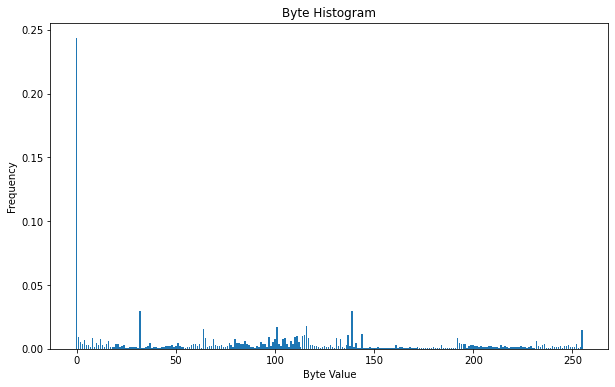

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(range(len(fg[1:])), fg[1:])
plt.xlabel('Byte Value')
plt.ylabel('Frequency')
plt.title('Byte Histogram')
plt.show()

## 2.字节熵直方图

In [20]:
import numpy as np
x=np.arange(16)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [45]:
def rolling_window(a, window):
    shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
    strides = a.strides + (a.strides[-1],)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)

# 遍历返回的窗口列表，其中步长为1，窗口大小为2
blocks = rolling_window(x, 2)[::1, :]

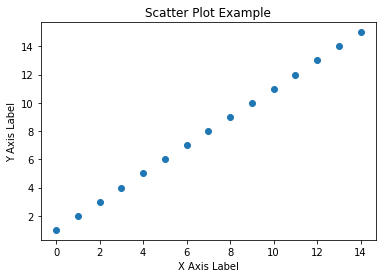

In [44]:
df = pd.DataFrame(blocks,columns=['Byte1','Byte2'])
plt.scatter(df['Byte1'], df['Byte2'])
# 添加标题和标签
plt.title('Scatter Plot Example')
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')

# 显示图表
plt.show()

In [46]:
output = np.zeros((16, 16), dtype=np.int8) # 定义一个16×16矩阵保存计算的字节熵直方图
a = np.frombuffer(bytez, dtype=np.uint8)
window=2
step=1
shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
strides = a.strides + (a.strides[-1],)
blocks = np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)[::step, :]
blocks

array([[ 77,  90],
       [ 90, 144],
       [144,   0],
       ...,
       [112, 100],
       [100,  98],
       [ 98,   0]], dtype=uint8)

<AxesSubplot:xlabel='Byte1', ylabel='Byte2'>

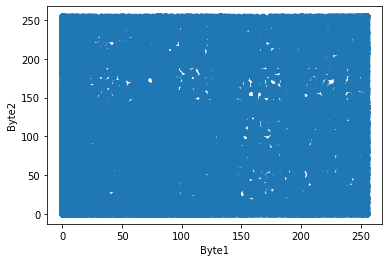

In [50]:
df = pd.DataFrame(blocks,columns=['Byte1','Byte2'])
df.plot.scatter(x='Byte1', y='Byte2')

In [60]:
def _entropy_bin_counts(block):
    window = 16
    c = np.bincount(block >> 4, minlength=16)
    p = c.astype(np.float32) / window
    wh = np.where(c)[0]
    H = np.sum(-p[wh] * np.log2(p[wh]))
    Hbin = int(H * 2)  
    if Hbin == 16:
        Hbin = 15
    return Hbin, c

In [61]:
for block in blocks:
    Hbin, c = _entropy_bin_counts(block)
    output[Hbin, :] += c
import pandas as pd
pd.DataFrame(output)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,44,-56,44,32,-28,16,36,52,-60,-52,-40,116,56,20,-100,72
1,-64,52,38,-100,120,-116,-122,-106,-98,-14,-32,54,-52,6,30,108
2,-107,-88,-56,70,3,2,-70,126,94,-58,58,126,24,62,-88,-28
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 3.文本特征

In [62]:
import re
_allstrings = re.compile(b'[\x20-\x7f]{5,}')
allstrings = _allstrings.findall(bytez)
[len(allstrings)]

[510]

In [69]:
allstrings

[b'!This program cannot be run in DOS mode.',
 b'.text',
 b'`.rdata',
 b'@.data',
 b'.rsrc',
 b'wBg\x7f$yA',
 b'jQhPU@',
 b'p(hRP',
 b'@ht,@;Q',
 b'SV]5d',
 b'tUPhP',
 b'D@AePVRQ',
 b'`7}::+5',
 b'm>n%Y',
 b'+#=iB',
 b'qT[9(tj',
 b',1ALij',
 b'f+*J>',
 b'h`16Dj WS',
 b'LP4+H',
 b"M'RPjh",
 b'ifE++r',
 b'QRPWS/4',
 b'PPQhPl@',
 b'PPRW`',
 b'.P/Qh',
 b'PQhhD@',
 b'PPPXQh',
 b'PRQPP',
 b'H%bhh',
 b't7c5C',
 b'bhpN@',
 b'WMs8V',
 b'3&_^[',
 b'QRh@S',
 b';AusC',
 b't<_^[]',
 b'ufPQh',
 b'bV v}n',
 b'usPPP',
 b'A6re;',
 b'}n_^[',
 b'B"/ W',
 b'VBjPS',
 b'V(QRP',
 b',k*(_^3',
 b' _^[]',
 b'4?:u6;',
 b'$SVhu',
 b'9EqsE',
 b'E0N t',
 b't"j.V',
 b'QRjxj',
 b'nts;~',
 b'F@;7u',
 b'MPSVWa}',
 b'PWRQJ',
 b'M$+a_',
 b'UaPQR',
 b'_wm]b',
 b'E`= N',
 b'M@Vou',
 b'ElPg~f',
 b'F_3B^',
 b'PWVP|E',
 b'U+VQ[',
 b'PQ~{|',
 b'!u9Ph',
 b'fbtM9',
 b'SSSSS',
 b'RQuk;',
 b'G>j^QPVPz',
 b'6h W@',
 b'MDQR8',
 b'SVW<}',
 b'E9u4;',
 b'ug_^3',
 b'K<hCD;',
 b'+K_^@[]',
 b'~/P@A',
 b'SV{D$',
 b'(null)',
 b'0123456789ab

In [64]:
# 平均可读字符串长度
string_lengths = [len(s) for s in allstrings]
print(string_lengths)
avlength = sum(string_lengths) / len(string_lengths)
avlength

[40, 5, 7, 6, 5, 7, 6, 5, 7, 5, 5, 8, 7, 5, 5, 7, 6, 5, 9, 5, 6, 6, 7, 7, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 7, 5, 6, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 9, 5, 5, 5, 5, 5, 6, 7, 5, 5, 6, 16, 16, 16, 16, 10, 65, 6, 217, 7, 6, 7, 12, 8, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 7, 6, 7, 6, 13, 12, 7, 6, 8, 6, 6, 6, 7, 7, 10, 11, 7, 5, 11, 13, 13, 9, 16, 12, 12, 10, 14, 16, 10, 12, 23, 22, 10, 15, 8, 7, 15, 17, 20, 11, 23, 20, 22, 23, 20, 31, 5, 14, 12, 19, 12, 12, 14, 11, 11, 19, 15, 26, 9, 11, 12, 25, 21, 20, 12, 8, 20, 16, 18, 13, 14, 12, 9, 8, 13, 12, 24, 7, 12, 11, 7, 7, 10, 9, 7, 70, 37, 15, 29, 11, 7, 5, 27, 26, 21, 35, 8, 23, 24, 28, 26, 45, 13, 30, 6, 20, 20, 30, 16, 8, 30, 44, 19, 16, 14, 24, 16, 10, 14, 8, 22, 11, 24, 6, 25, 14, 16, 16, 11, 20, 23, 5, 5, 5, 5, 5, 9, 7, 5, 5, 5, 31, 7, 28, 27, 14, 32, 17, 60, 31, 31, 31, 29, 81, 53, 78, 55, 83, 53, 80, 55, 86, 53, 83, 55, 94, 53, 91, 55, 45, 45, 45, 45, 43, 21, 39, 38, 50, 72, 40,

26.533333333333335

In [65]:
# 可读字符直方图
as_shifted_string = [b - ord(b'\x20') for b in b''.join(allstrings)]
c = np.bincount(as_shifted_string, minlength=96) # 定义一个长度为96的向量统计其直方图
p = c.astype(np.float32) / c.sum() # 计算直方图概率
p

array([1.4173810e-01, 3.6949452e-04, 2.2169673e-04, 2.2169673e-04,
       6.6509016e-04, 1.7661838e-02, 5.1729236e-04, 9.6068578e-04,
       1.9213716e-03, 1.6257759e-03, 3.6949452e-04, 8.8678690e-04,
       2.2169673e-03, 4.1383388e-03, 6.7986995e-03, 9.2373630e-03,
       1.6257759e-03, 1.6257759e-03, 5.3207213e-03, 2.2169673e-03,
       5.2468223e-03, 3.3254507e-03, 5.2468223e-03, 1.1084836e-03,
       7.3898904e-04, 1.2562814e-03, 9.9763526e-03, 1.1823825e-03,
       1.2932309e-02, 3.5471476e-03, 1.2932309e-02, 1.4779781e-04,
       1.5223174e-02, 5.4685189e-03, 1.5518770e-03, 5.0990246e-03,
       2.2908661e-03, 2.8081585e-03, 2.8820573e-03, 2.2908661e-03,
       1.9952704e-03, 5.5424180e-03, 2.2169673e-04, 8.8678690e-04,
       2.3647649e-03, 1.3301803e-03, 3.2515519e-03, 2.5125628e-03,
       6.7248004e-03, 1.6257759e-03, 3.8427431e-03, 7.0942952e-03,
       9.3112625e-03, 1.2562814e-03, 1.8474726e-03, 2.8081585e-03,
       3.6949452e-04, 2.9559562e-04, 3.6949452e-04, 1.2562814e

In [66]:
# 可读字符信息熵
wh = np.where(c)[0] 
wh

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95], dtype=int64)

In [67]:
H = np.sum(-p[wh] * np.log2(p[wh])) # 计算信息熵
H

5.104449

[b'C:\\local0\\asf\\release\\build-2.2.14\\support\\Release\\ab.pdb']

In [79]:
# C盘路径字符串个数 _paths 表示可读字符串
_paths = re.compile(b'c:\\\\', re.IGNORECASE)
[len(_paths.findall(bytez))],_paths

([1], re.compile(rb'c:\\', re.IGNORECASE))

In [78]:
# 注册表字符串个数
_registry = re.compile(b'HKEY_')
[len(_registry.findall(bytez))]

[0]

In [82]:
# URL字符串个数

_urls = re.compile(b'https?://', re.IGNORECASE)
[len(_urls.findall(bytez))]

[7]

In [83]:
# MZ头的个数
_mz = re.compile(b'MZ')
[len(_mz.findall(bytez))]

[1]

In [89]:
fg = np.concatenate([
    [[len(allstrings)]],
    [[avlength]],
    [p.tolist()],
    [[H]],
    [[len(_paths.findall(bytez))]],
    [[len(_urls.findall(bytez))]],
    [[len(_registry.findall(bytez))]],
    [[len(_mz.findall(bytez))]]], axis=-1).flatten().astype(np.float32)

pd.DataFrame(fg)

,0
0,510.000000
1,26.533333
2,0.141738
3,0.000369
4,0.000222
...,...
98,5.104449
99,1.000000
100,7.000000
101,0.000000


## 4.文件信息

https://bbs.kanxue.com/thread-246699.htm

In [105]:
# 指定PE文件的路径
# pe_file_path = r'adb.exe'
pe_file_path = r'D:\Documents\天池竞赛\WebSecMLLearnNote\Code3\第8章　恶意程序检测\a1303f026b713fbe7fe165cc8609847f5ec46bb2dfdbe86cff4b12deae728ca3'

# 以二进制模式打开文件并读取内容
with open(pe_file_path, 'rb') as file:
    bytez = file.read()

In [106]:
import lief
binary = lief.parse(bytez)
binary

In [110]:
np.asarray([
    binary.virtual_size,
    binary.has_debug,
    len(binary.exported_functions),
    len(binary.imported_functions),
    binary.has_relocations,
    binary.has_resources,
    # binary.has_signature,
    # binary.authentihash().hex() if binary.authentihash() else None,
    binary.has_tls,
    len(binary.symbols),]).flatten().astype(np.float32)

array([9.0112e+04, 1.0000e+00, 0.0000e+00, 1.0000e+02, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00], dtype=float32)

# 8.4　PE文件节的特征提取